In [129]:
#import libs
import matplotlib.pyplot as plt

import plotly as py
import plotly.express as px

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

Define the Problem ...

Task of competition is to predict using ML whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. 

Training data has been provided in the file train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

Testing data has been provided in the file test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. 

Your task is to predict the value of Transported for the passengers in this set.

Define the type of Problem ...

Given that we need to predict the total value of passengers transported, the output will be a category or label (i.e. transported (True) or not transported (False). Therefore, this is a classification type of problem to solve. 

Next steps ...
1.Binary classification, as there are only two possible outcomes, True or False
2.Are there any relationships between variables? Is there a decision boundary that seperates different classes? 
3.Evaluation metrics for classification include:- 
-accuracy
-precision
-recall
-F1-score 


In [182]:
#Gather and prepare training data (data is already split between training and test data)

file_path = r"C:\Users\Krupa\Documents\Krups Coding\Kaggle\ML_titanic\train.csv"
train_data = pd.read_csv(file_path)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [54]:
train_data.shape

(8693, 14)

In [7]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [110]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [159]:
#Clean and pre-process data 
#check and handle missing values, outliers etc. 

print('missing values (%) per column: \n', 100*train_data.isnull().mean())

missing values (%) per column: 
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [160]:
#overall percentage of missing values 
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)
print('Overall percentage of missing values in dataset: ', percent_missing_vals,'%')


Overall percentage of missing values in dataset:  1.91 %


There is a small percentage of missing values in 12 out of 14 of the columns. The only columns without missing data are PassengerId and Transported.

For the numerical columns we could impute the mean value:-
1.Age
2.RoomService
3.FoodCourt
4.ShoppingMall
5.Spa
6.VRDeck


In [161]:
#Let's fill the missing numerical values with mean values

mean_age=train_data['Age'].mean()
mean_RS=train_data['RoomService'].mean()
mean_FC=train_data['FoodCourt'].mean()
mean_SM=train_data['ShoppingMall'].mean()
mean_Spa=train_data['Spa'].mean()
mean_VRDeck=train_data['VRDeck'].mean()


train_data['Age'].fillna(mean_age, inplace=True)
train_data['RoomService'].fillna(mean_RS, inplace=True)
train_data['FoodCourt'].fillna(mean_FC, inplace=True)
train_data['ShoppingMall'].fillna(mean_SM, inplace=True)
train_data['Spa'].fillna(mean_Spa, inplace=True)
train_data['VRDeck'].fillna(mean_VRDeck, inplace=True)

In [162]:
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
updated_percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)


print('Percentage of missing values following mean value update',updated_percent_missing_vals , '%')

Percentage of missing values following mean value update 0.99 %


Now we are down to less than 1% of missing values in the remaining columns! Let's take a look at the category columns:-

1.HomePlanet
2.CryoSleep
3.Cabin
4.Destination
5.VIP
6.Name 



In [163]:
#how many values are missing in the category columns?

missing_hp_val=train_data['HomePlanet'].isnull().sum()
missing_cs_val=train_data['CryoSleep'].isnull().sum()
missing_cab_val=train_data['Cabin'].isnull().sum()
missing_dest_val=train_data['Destination'].isnull().sum()
missing_vip_val=train_data['VIP'].isnull().sum()
missing_name_val=train_data['Name'].isnull().sum()

print('Missing Home Planet Values:', missing_hp_val)
print('Missing CryoSleep Values:', missing_cs_val)
print('Missing Cabin Values:', missing_cab_val)
print('Missing Destination Values:', missing_dest_val)
print('Missing VIP Values:', missing_vip_val)
print('Missing Name Values:', missing_name_val)



Missing Home Planet Values: 201
Missing CryoSleep Values: 217
Missing Cabin Values: 199
Missing Destination Values: 182
Missing VIP Values: 203
Missing Name Values: 200


The missing values in the category column seem to hover around the 200-mark. I think it would be sensible to drop the rows where the Name values are missing. 


In [164]:
train_data.dropna(subset=['Name'], inplace=True)
train_data.shape

(8493, 14)

In [165]:
#Let's review the missing values 

updated_missing_hp_val=train_data['HomePlanet'].isnull().sum()
updated_missing_cs_val=train_data['CryoSleep'].isnull().sum()
updated_missing_cab_val=train_data['Cabin'].isnull().sum()
updated_missing_dest_val=train_data['Destination'].isnull().sum()
updated_missing_vip_val=train_data['VIP'].isnull().sum()
updated_missing_name_val=train_data['Name'].isnull().sum()

print('Missing Home Planet Values:', updated_missing_hp_val)
print('Missing CryoSleep Values:', updated_missing_cs_val)
print('Missing Cabin Values:', updated_missing_cab_val)
print('Missing Destination Values:', updated_missing_dest_val)
print('Missing VIP Values:', updated_missing_vip_val)
print('Missing Name Values:', updated_missing_name_val)

Missing Home Planet Values: 194
Missing CryoSleep Values: 207
Missing Cabin Values: 197
Missing Destination Values: 178
Missing VIP Values: 202
Missing Name Values: 0


There doesn't seem to be a relationship between the missing names and other category columns as there is a still approx. 200 rows missing in the other columns. 


In [166]:
#mode method returns the most frequently occurring value and iloc[o] returns the first from a series
mode_hp=train_data['HomePlanet'].mode().iloc[0]
mode_cs=train_data['CryoSleep'].mode().iloc[0]
mode_cab=train_data['Cabin'].mode().iloc[0]
mode_dest=train_data['Destination'].mode().iloc[0]
mode_vip=train_data['VIP'].mode().iloc[0]


print('Mode Home Planet Value:', mode_hp)
print('Mode CryoSleep Value:', mode_cs)
print('Mode Cabin Value:', mode_cab)
print('Mode Destination Value:', mode_dest)
print('Mode VIP Value:', mode_vip)



Mode Home Planet Value: Earth
Mode CryoSleep Value: False
Mode Cabin Value: G/734/S
Mode Destination Value: TRAPPIST-1e
Mode VIP Value: False


In [167]:
#Let's first fill the home planet values and destination values with the mode
train_data['HomePlanet'].fillna(mode_hp, inplace=True)
train_data['Destination'].fillna(mode_dest, inplace=True)


In [141]:
train_data.shape

(8493, 14)

In [168]:
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
second_updated_percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)

print('Percentage of missing values following mode update',second_updated_percent_missing_vals , '%')

Percentage of missing values following mode update 0.51 %


Now the percent of missing values is around half a percent, I think it would be reasonable to drop the rows with missing values in the CryopSleep column and Cabin Value column as it would be difficult to carry out accurate imputation in these columns. 

In [169]:
#drop missing rows in cryosleep, vip and cabin columns

train_data.dropna(subset=['CryoSleep', 'Cabin', 'VIP'], inplace=True)

train_data.shape

(7907, 14)

In [170]:
print('missing values (%) per column: \n', 100*train_data.isnull().mean())

missing values (%) per column: 
 PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
dtype: float64


Now the missing values have been dealt with, we can move on to the next step. 

To identify any correlations between columns, it could be useful to map category columns data values to integers and take a deeper dive into the dataset. 

The cabin column provides information on the deck/number/side (i.e. Port or Starboard). 


In [183]:
#Let's split the cabin column into three separate columns for deck, number and side.

train_data[['Cabin Deck', 'Cabin Number', 'Cabin Side']] = train_data['Cabin'].str.split('/', expand=True)


In [184]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Deck,Cabin Number,Cabin Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [185]:
#map data in Home Planet and Destination columns 
mapping_dict1 = {'Earth':1, 'Europa':2, 'Mars':3}
train_data['HomePlanet'] = train_data['HomePlanet'].map(mapping_dict1)

mapping_dict2 = {'P':1, 'S':2}
train_data['Cabin Side'] = train_data['Cabin Side'].map(mapping_dict2)

mapping_dict3 = {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3}
train_data['Destination'] = train_data['Destination'].map(mapping_dict3)

mapping_dict4 = {'A': 1, 'B': 2, 'C': 3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
train_data['Cabin Deck'] = train_data['Cabin Deck'].map(mapping_dict4)

In [186]:
train_data['Cabin Deck'].value_counts()

Cabin Deck
6.0    2794
7.0    2559
5.0     876
2.0     779
3.0     747
4.0     478
1.0     256
8.0       5
Name: count, dtype: int64

In [92]:
#map columns with bool values to floating ints.

#train_data['CryoSleep'] = train_data['CryoSleep'].astype('float32')
#train_data['VIP'] = train_data['VIP'].astype('float32')

In [187]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Deck,Cabin Number,Cabin Side
0,0001_01,2.0,False,B/0/P,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,0,1.0
1,0002_01,1.0,False,F/0/S,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,6.0,0,2.0
2,0003_01,2.0,False,A/0/S,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,0,2.0
3,0003_02,2.0,False,A/0/S,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,0,2.0
4,0004_01,1.0,False,F/1/S,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,6.0,1,2.0


In [188]:
reduced_train_data=train_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Cabin Number'])
reduced_train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin Deck,Cabin Side
0,2.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0
1,1.0,False,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,6.0,2.0
2,2.0,False,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0,2.0
3,2.0,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0,2.0
4,1.0,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.0,False,3.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1.0,1.0
8689,1.0,True,2.0,18.0,False,0.0,0.0,0.0,0.0,0.0,False,7.0,2.0
8690,1.0,False,1.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,7.0,2.0
8691,2.0,False,3.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,5.0,2.0


In [189]:
reduced_train_data.dtypes

HomePlanet      float64
CryoSleep        object
Destination     float64
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Cabin Deck      float64
Cabin Side      float64
dtype: object

In [191]:
reduced_train_data.describe(exclude='number')

,CryoSleep,VIP,Transported
count,8476,8490,8693
unique,2,2,2
top,False,False,True
freq,5439,8291,4378


In [190]:
reduced_train_data.corr().style.background_gradient(cmap='Oranges')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin Deck,Cabin Side
HomePlanet,1.000000,0.088072,-0.038559,0.138058,0.127844,0.215963,0.070782,0.103070,0.055232,0.040292,0.118101,-0.418904,0.000528
CryoSleep,0.088072,1.000000,0.096722,-0.074273,-0.081402,-0.252396,-0.211510,-0.212514,-0.203991,-0.198857,0.468645,0.017823,0.019677
Destination,-0.038559,0.096722,1.000000,0.007978,0.044722,-0.047685,0.112180,-0.025433,0.058329,0.073707,0.109806,-0.189937,0.011142
Age,0.138058,-0.074273,0.007978,1.000000,0.092819,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.248003,0.011640
VIP,0.127844,-0.081402,0.044722,0.092819,1.000000,0.058785,0.129799,0.018295,0.061059,0.125974,-0.037650,-0.183393,-0.010117
RoomService,0.215963,-0.252396,-0.047685,0.068723,0.058785,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.026783,-0.012290
FoodCourt,0.070782,-0.211510,0.112180,0.130421,0.129799,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.324348,0.020149
ShoppingMall,0.103070,-0.212514,-0.025433,0.033133,0.018295,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,-0.032926,-0.020983
Spa,0.055232,-0.203991,0.058329,0.123970,0.061059,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,-0.229111,0.002031
VRDeck,0.040292,-0.198857,0.073707,0.101007,0.125974,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,-0.257326,-0.008154


r-values greater than 0.7 indicate a strong correlation between two attributes. From the graph above, there doesn't appear to be any strong correlations. However, there seems to be link between the passengers who requested to be in cryo sleep and passengers who were transported, with an r-value of 0.46  

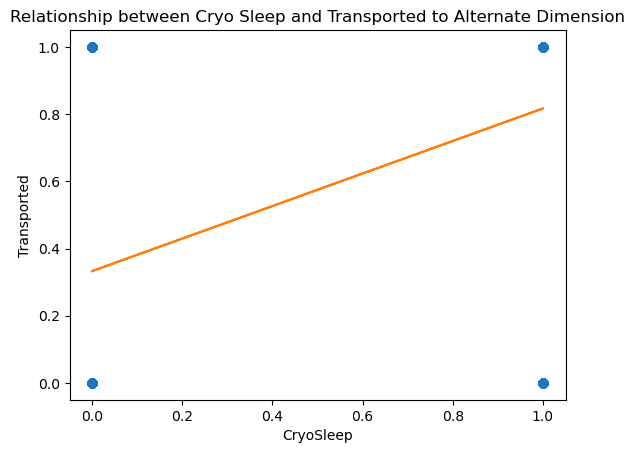

In [103]:
x = train_data['CryoSleep']
y = train_data['Transported']

plt.title('Relationship between Cryo Sleep and Transported to Alternate Dimension')
plt.xlabel('CryoSleep')
plt.ylabel('Transported')
plt.plot(x,y,'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)


Columns with integer values include:-
-Age
-Room Service (amount billed)
-Food Court (amount billed)
-Shopping mall (amount billed)
-Spa (amount billed)
-VR Deck (amount billed)


Non-integer value columns include:-
-PassengerId 
-HomePlanet
-CryoSleep
-Cabin 
-Destination
-VIP
-Name
-Transported


Let's take a look at each non-integer column in more detail. 

In [104]:
train_data['CryoSleep'].value_counts()

0.0    4274
1.0    2332
Name: CryoSleep, dtype: int64

In [105]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [106]:
#select the column we want to predict (i.e. the prediction target)
y = train_data.Transported


In [107]:
#choose features (i.e. columns from data used to make predictions)
train_data_features = ['CryoSleep']

X = train_data[filt_train_data_features]

In [108]:
#review data to be used to predic transportation
X.describe()

,CryoSleep
count,6606.000000
mean,0.353012
std,0.477944
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [109]:
X.head()

,CryoSleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [110]:
y.describe()

count     6606
unique       2
top       True
freq      3327
Name: Transported, dtype: object

In [111]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [112]:
X.isnull().sum()

CryoSleep    0
dtype: int64

In [113]:
y.isnull().sum()

0

In [114]:
y.shape

(6606,)

In [89]:
#building an ML model
#steps include
#1. define - what type of model 
#2. fit - find patterns from data provided
#3. predict 
#4. evaluate - determine accuracy of model using a metric


In [115]:
from sklearn.tree import DecisionTreeRegressor
#define model and specify a number for random_state to ensure same results each time

train_model = DecisionTreeRegressor(random_state=1)
#fit model
train_model.fit(X,y)


DecisionTreeRegressor(random_state=1)

In [116]:
X.head()

,CryoSleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [117]:
print(filt_train_model.predict(X.head()))

[0.33270941 0.33270941 0.33270941 0.33270941 0.33270941]


In [118]:
#using Mean Absolute Error (MAE) we can summarise the model quality

error = actual-predicted

NameError: name 'actual' is not defined

In [44]:
#we need a model to caluclate MAE 
filt_train_model = DecisionTreeRegressor()
#fit model
filt_train_model.fit(X,y)


DecisionTreeRegressor()

In [45]:
from sklearn.metrics import mean_absolute_error

predicted_outcome = filt_train_model.predict(X)
mean_absolute_error(y, predicted_outcome)

0.39288572435721275

array([0., 1., 0., ..., 1., 0., 1.])

The next question is, which data is important and will have an influence on our final prediction (attribute- Transported). 

In [28]:
test_data = pd.read_csv(r"C:\Users\krupa\OneDrive\Desktop\Titanic_ship_ML\data\test.csv")

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [29]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')